In [1]:
library(repr)
library(pca3d)
library(ggfortify)
library(devtools)
library(factoextra)
library(gridExtra)

Loading required package: ggplot2

Loading required package: usethis

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ



In [2]:
options(repr.plot.width=5, repr.plot.height=5)

In [3]:
df = read.table('nut_dataframe.csv', sep=',', header=TRUE, na.strings="NA")
head(df)

X,Germ,GBegF,BegFEndF,EndFBegM,BegMEndM,Height,Hlp,NoPodsWeight,PodsWeight,⋯,AscoRes,StemBr,StemL1ord,StemBr1ord,StemBr2ord,PodD,PodS,PodShape,SeedShape,SeedCol
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,-2.12899,-0.9808181,0.2691854,-0.1585673,-1.0883455,0.7900028,0.5494152,0.7037179,0.7337723,⋯,3,2,1,1,0,0,0,1,0,1
1,-2.12899,-0.6495050,0.2691854,-0.1585673,-1.7436236,0.6776419,-0.5445412,0.7527438,0.8547601,⋯,2,2,1,1,0,0,1,1,0,1
2,-2.12899,-0.6495050,0.2691854,-0.9909240,0.8774887,0.4529201,-0.5445412,0.3609298,0.4388255,⋯,2,2,1,1,0,0,1,1,0,1
3,-2.12899,0.6757476,-0.5464464,-0.4003575,-0.4330675,0.6776419,0.9869978,0.7633832,0.1432029,⋯,3,1,1,1,0,0,1,1,0,1
4,-2.12899,-1.3121313,0.4461669,-0.4003575,-1.0883455,-0.3336062,0.5494152,-0.8607554,-0.1032154,⋯,1,3,0,1,1,0,1,1,0,1
5,-2.12899,-0.9808181,0.6145117,-0.9909240,1.5327668,0.1158374,-0.5445412,-0.2002730,0.7816652,⋯,1,3,1,1,1,1,1,1,0,2


In [4]:
summary(df)

       X              Germ             GBegF            BegFEndF      
 Min.   :  0.0   Min.   :-2.1290   Min.   :-4.9566   Min.   :-5.1070  
 1st Qu.:100.8   1st Qu.: 0.1167   1st Qu.:-0.6495   1st Qu.:-0.7845  
 Median :201.5   Median : 0.1167   Median : 0.3444   Median :-0.1146  
 Mean   :201.5   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:302.2   3rd Qu.: 0.1167   3rd Qu.: 0.3444   3rd Qu.: 0.6145  
 Max.   :403.0   Max.   : 2.3625   Max.   : 6.9707   Max.   : 3.1666  
 NA's   :2       NA's   :2         NA's   :2         NA's   :2        
    EndFBegM           BegMEndM           Height             Hlp         
 Min.   :-4.66913   Min.   :-2.7265   Min.   :-3.2550   Min.   :-2.0761  
 1st Qu.:-0.67448   1st Qu.:-0.7607   1st Qu.:-0.4460   1st Qu.:-0.5445  
 Median : 0.05772   Median :-0.1054   Median : 0.1158   Median :-0.1070  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.59631   3rd Qu.: 0.5498   3rd Qu.: 0.6776   3rd Qu

In [5]:
df <- df[complete.cases(df), ]
df <- scale(df)

In [6]:
pca <- prcomp(df[,-1], center = T, scale = T)

In [7]:
pca_cum_sdev <- pca
pca_cum_sdev$sdev <- cumsum(pca$sdev)
pca_cum_sdev$sdev <- sapply(pca_cum_sdev$sdev, function(x) x / sum(pca_cum_sdev$sdev))

In [9]:
eigs <- pca$sdev ^ 2
cum.var <- cumsum(eigs) / sum(eigs)

In [10]:
cum.var.df <- data.frame(cumvar = round(cum.var * 100, digits = 1), 
                         dim = seq(1, length(cum.var)))
cum.var.df$dim <- as.integer(cum.var.df$dim)

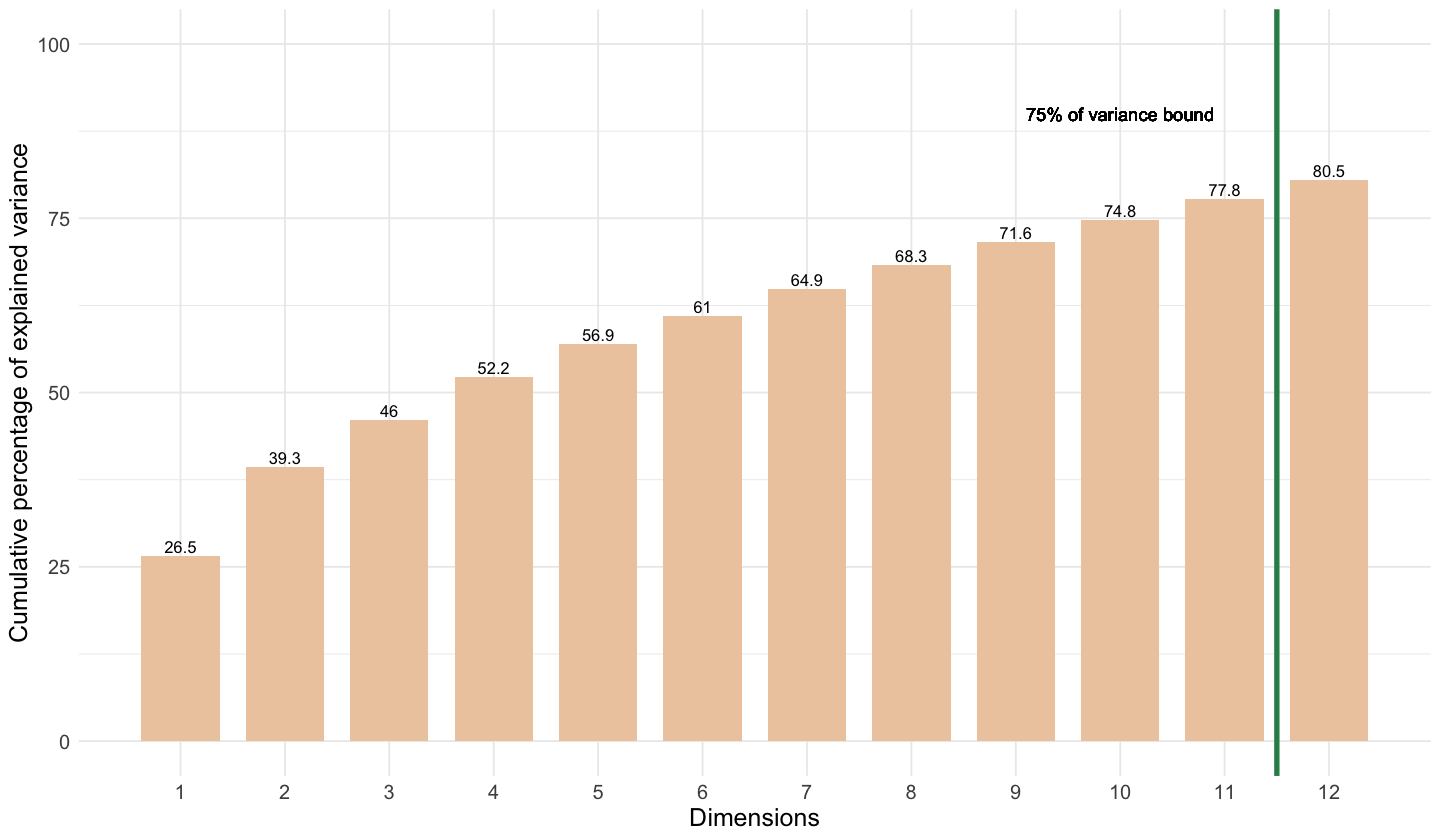

In [12]:
options(repr.plot.width = 12, repr.plot.height = 7)
ggplot(data = cum.var.df[1:12,], aes(x = dim, y = cumvar)) + 
    geom_bar(stat = "identity", fill = "peachpuff2", width = 0.75) +
    geom_text(aes(label = cumvar), vjust = -0.3, size = 3.5) +
    geom_vline(xintercept = 11.5, color = "seagreen4", size = 1.5) +
    scale_x_discrete(limits=c("1", "2", "3", "4", "5", "6", "7",
                              "8", "9", "10", "11", "12"),
                     name = "Dimensions") +
    scale_y_continuous(limits = c(0, 100),
                       name = "Cumulative percentage of explained variance") +
    geom_text(x = 10, y = 90, label = "75% of variance bound") +
    theme_minimal() + 
    theme(text = element_text(size=15))

#### Categorial feature in the 1st principal component with max weight is FloCol (green line)

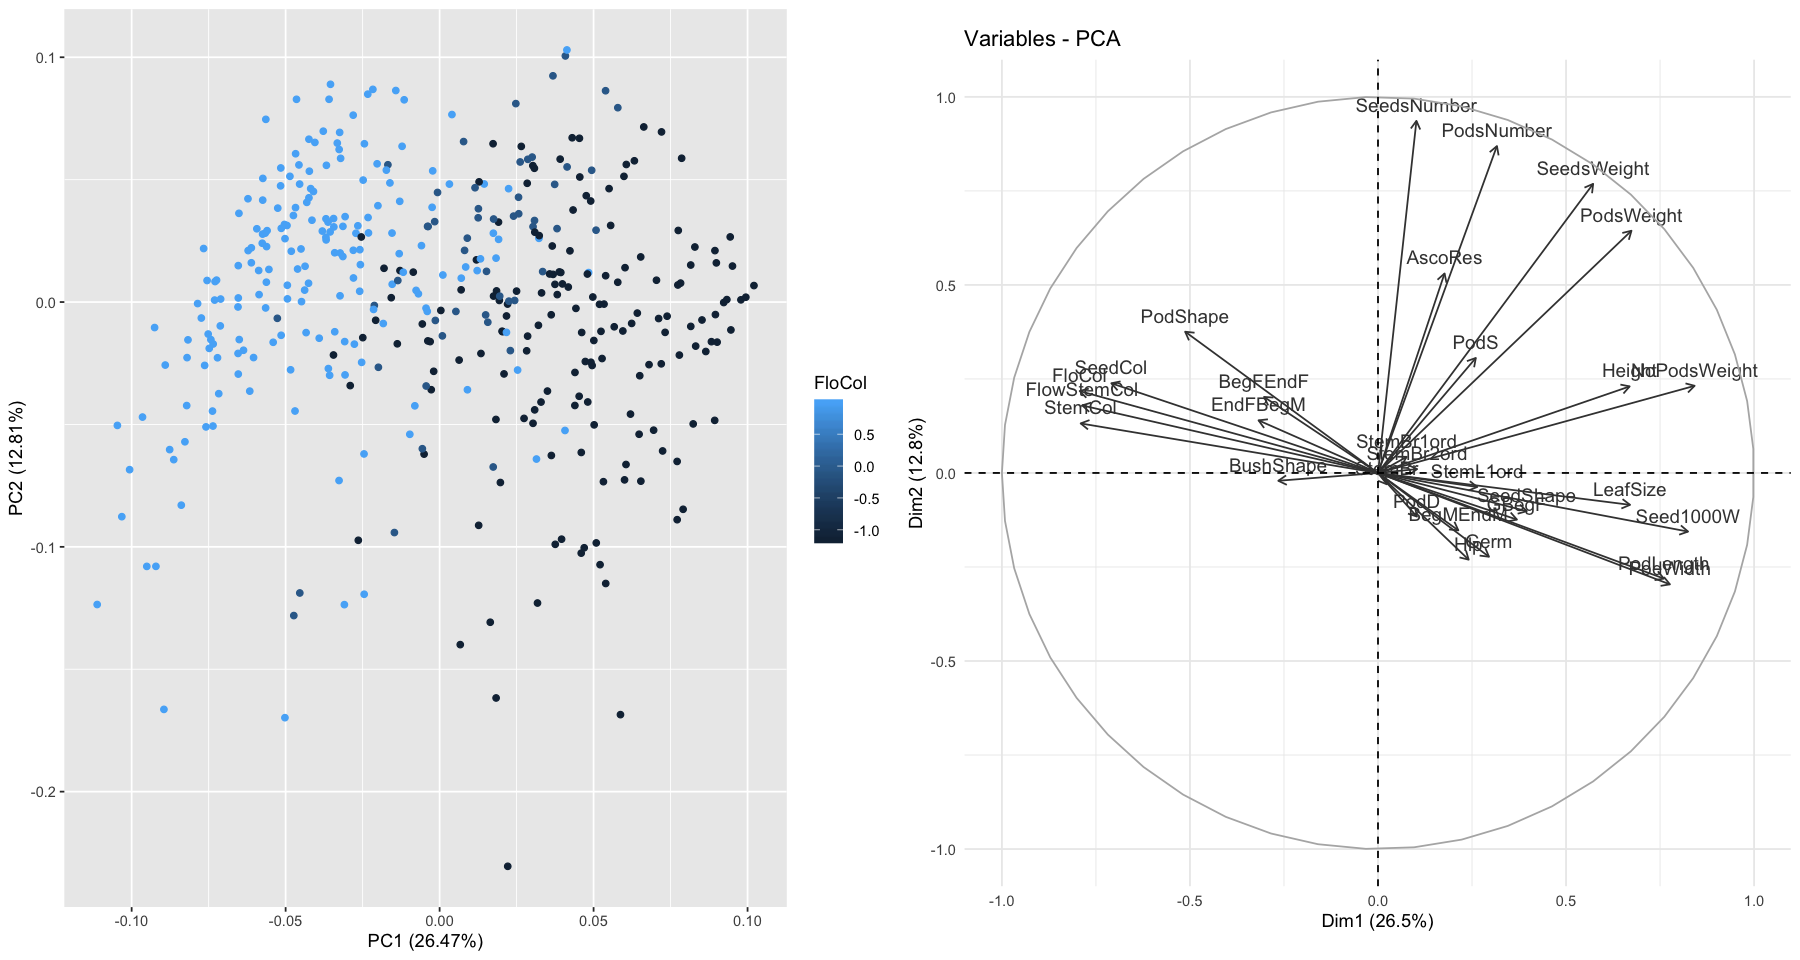

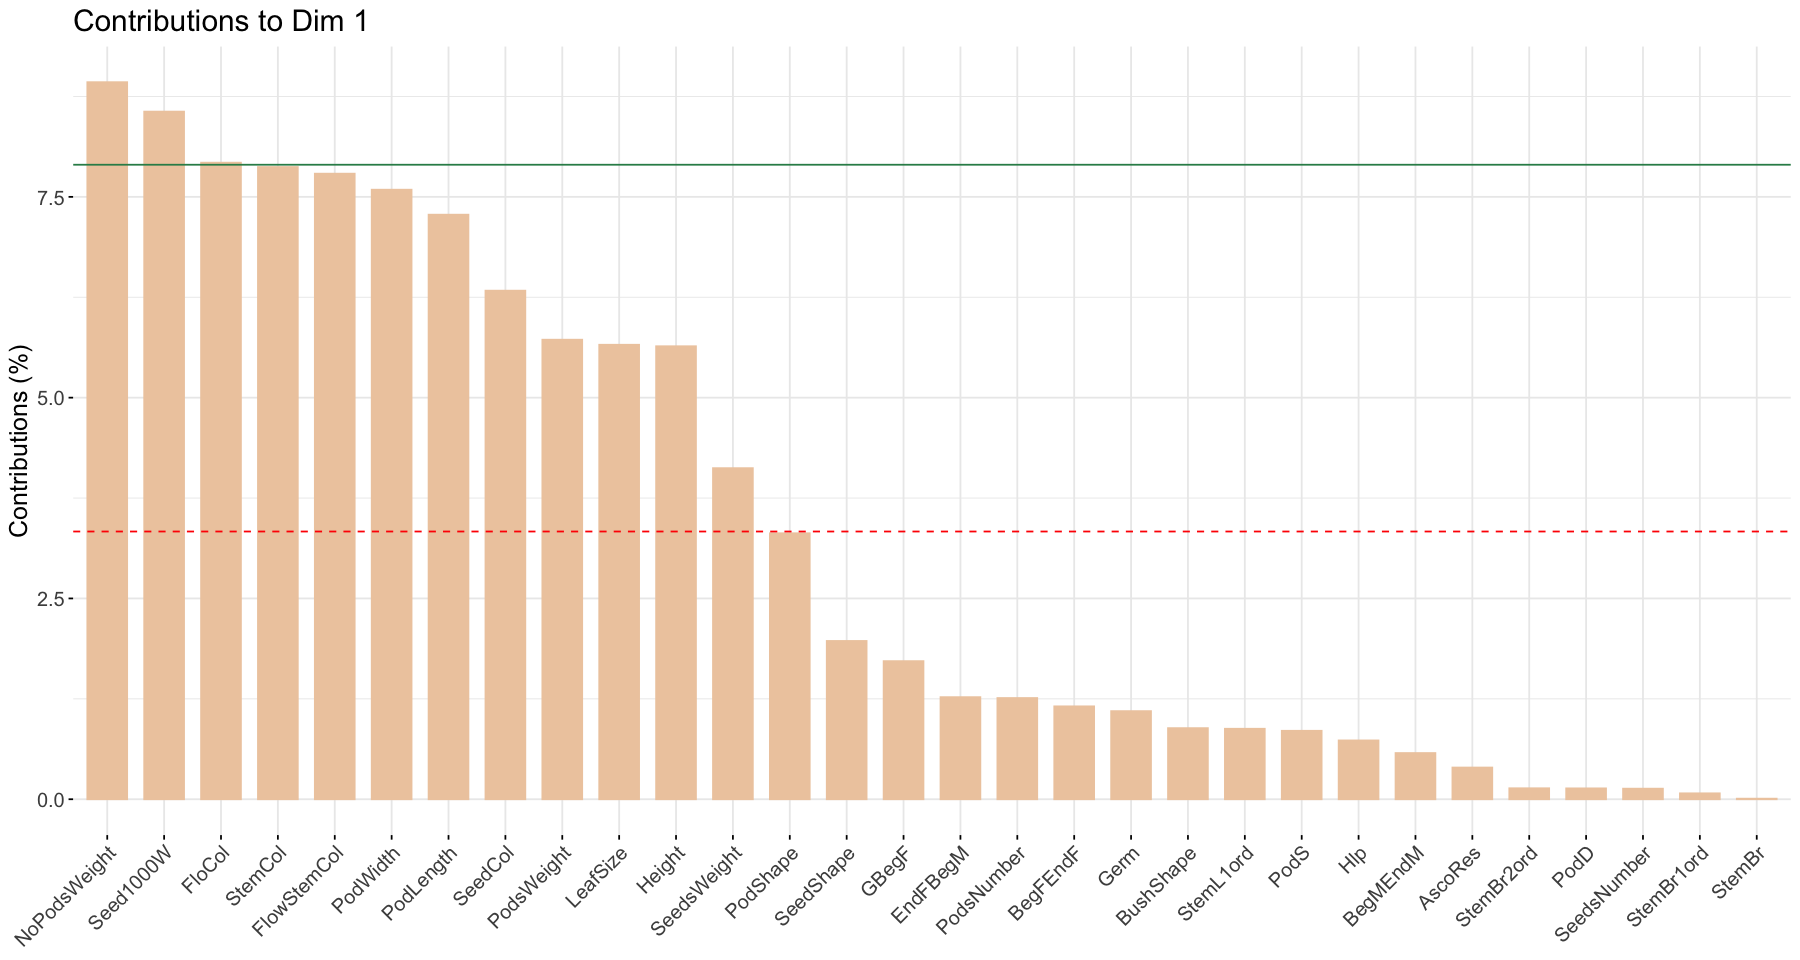

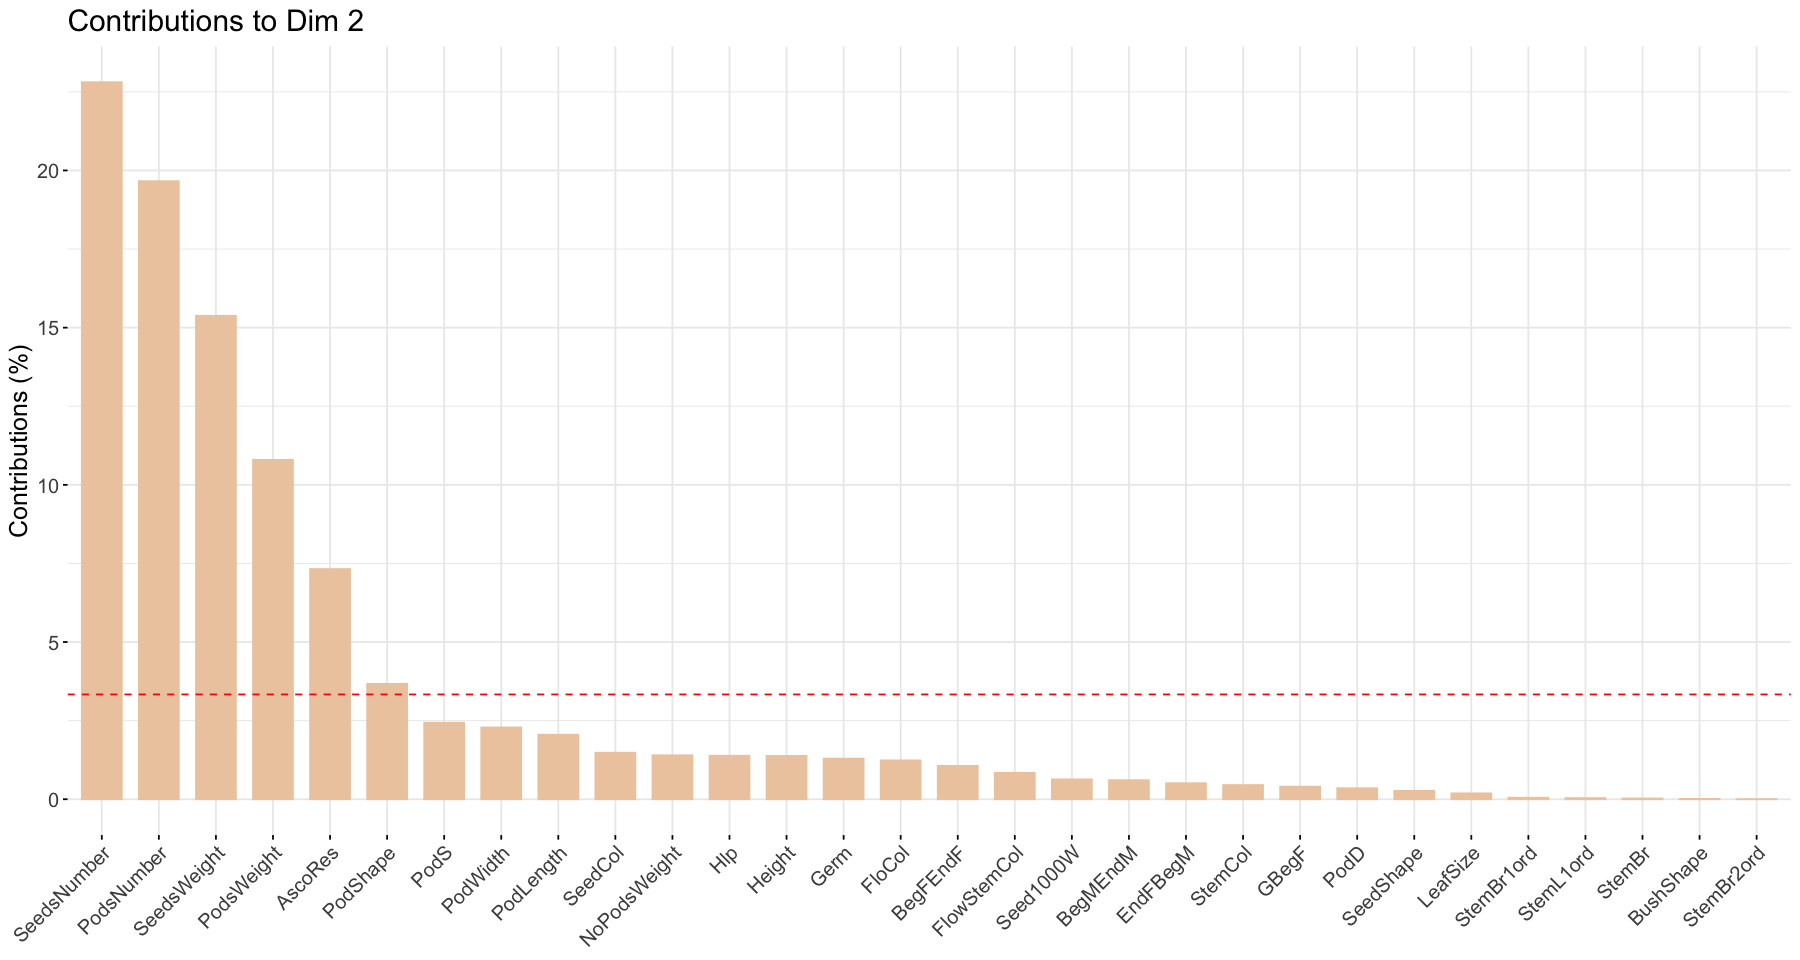

In [17]:
options(repr.plot.width=15, repr.plot.height=8)

g1 <- autoplot(pca, colour = 'FloCol')
g2 <- fviz_pca_var(pca, col.var = "grey25") + 
scale_color_gradient2(low="white", mid="blue", 
                      high="red", midpoint = 96) +
theme_minimal()
grid.arrange(g1, g2, ncol=2)


fviz_contrib(pca, choice = "var", axes = 1, color = "peachpuff2",
             fill = "peachpuff2") +
  labs(title = "Contributions to Dim 1") +
  geom_hline(yintercept = 7.9, color = "seagreen4") +
  theme(text = element_text(size=15))

# Variable contributions on axes 1 + 2
fviz_contrib(pca, choice = "var", axes = 2, color = "peachpuff2",
             fill = "peachpuff2") +
  labs(title = "Contributions to Dim 2") +
  theme(text = element_text(size=15))
